# Unit 5 - Financial Planning


In [117]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [118]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [119]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = 12000.00

### Collect Crypto Prices Using the `requests` Library

In [120]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [121]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [122]:
# Fetch current BTC price
# YOUR CODE HERE!

'''change to json format'''
btc_url=btc_url + "?format=json"

btc_response_data=requests.get(btc_url)


'''convert to json data'''
btc_data=btc_response_data.json()
'''test print json data to iterate to btc price value. commented out for brevity'''
# print(json.dumps(btc_data, indent=4))

'''assign btc value to variable'''
btc_price=btc_data['data']['1']['quotes']['USD']['price']
# print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!]
eth_url=eth_url+"?format=json"
eth_response_data=requests.get(eth_url)

'''convert to json data'''
eth_data=eth_response_data.json()
'''test print json data to iterate to eth price value.'''
# print(json.dumps(eth_data, indent=4))

eth_price=eth_data['data']['1027']['quotes']['USD']['price']
# print(eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13627.70
The current value of your 5.3 ETH is $2040.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [123]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [124]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

'''test keys'''
# print(f"Alpaca Key: {type(alpaca_api_key)}")
# print(f"Alpaca Secret Key: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [125]:
# Format current date as ISO format
# YOUR CODE HERE!
today=pd.Timestamp('2020-08-19', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio=alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

'''Remove System Time/Trade Close time from index'''
df_portfolio.index=df_portfolio.index.date
df_portfolio
    
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.37
Current SPY closing price: $337.22


In [126]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16861.00
The current value of your 200 AGG shares is $23674.00


### Savings Health Analysis

In [27]:
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame()
savings_crypto={
    'Amount':[my_btc,my_eth],
}

df_savings=pd.DataFrame(savings_crypto)
# # df_savings=df_savings.set_index(['BTC','ETH'])
# df_savings.rename(index={0: "BTC", 1: "ETH"})
# df_savings.rename({0: "BTC", 1:"ETH"}, axis='index')

# Display savings DataFrame
display(df_savings)

,Amount
0,1.2
1,5.3


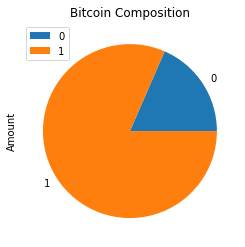

In [25]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='Amount', title="Bitcoin Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=my_btc_value+my_eth_value+my_agg_value + my_spy_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f' Congratulations! Your total savings of ${total_savings} exceeds your goal!')
elif total_savings == emergency_fund:
    print (f' Congratulations! Your total savings of ${total_savings} meets your goal!')
else:
    print(f' You still need ${(emergency_fund-total_savings)} to reach your goal!')

 Congratulations! Your total savings of $56179.143 exceeds your goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
'''Using code learned in class'''
end_date=pd.Timestamp.now(tz='America/New_York')
start_date=(end_date-pd.DateOffset(years=5)).isoformat()

# start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.index=df_stock_data.index.date
df_stock_data.head()

AGG                                          SPY           \
              open     high     low    close     volume    open     high   
2015-08-25  109.70  109.700  109.13  109.450  3843124.0  195.43  195.450   
2015-08-26  109.08  109.410  108.88  108.950  3673170.0  192.08  194.790   
2015-08-27  108.95  109.195  108.93  109.100  3454665.0  197.02  199.410   
2015-08-28  109.34  109.370  108.93  109.001  4604866.0  198.50  199.835   
2015-08-31  109.28  109.370  108.90  108.920  3866305.0  198.11  199.125   

                                       
               low   close     volume  
2015-08-25  187.06  187.24  270267060  
2015-08-26  188.37  194.56  255843495  
2015-08-27  195.21  199.28  226847229  
2015-08-28  197.92  199.28  111959716  
2015-08-31  197.01  197.60  108023599

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_dist.portfolio_data.head()

AGG                                                       SPY  \
              open     high     low    close     volume daily_return    open   
2015-08-25  109.70  109.700  109.13  109.450  3843124.0          NaN  195.43   
2015-08-26  109.08  109.410  108.88  108.950  3673170.0    -0.004568  192.08   
2015-08-27  108.95  109.195  108.93  109.100  3454665.0     0.001377  197.02   
2015-08-28  109.34  109.370  108.93  109.001  4604866.0    -0.000907  198.50   
2015-08-31  109.28  109.370  108.90  108.920  3866305.0    -0.000743  198.11   

                                                             
               high     low   close     volume daily_return  
2015-08-25  195.450  187.06  187.24  270267060          NaN  
2015-08-26  194.790  188.37  194.56  255843495     0.039094  
2015-08-27  199.410  195.21  199.28  226847229     0.024260  
2015-08-28  199.835  197.92  199.28  111959716     0.000000  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993358,1.006874,0.994937,1.007293,1.021949,1.005828,1.008824,1.006294,1.000178,0.997144,...,1.007267,1.001795,1.003064,1.004349,1.006585,0.997718,1.001975,1.008935,1.009324,1.004136
2,0.995675,1.002222,0.989813,0.997579,1.029256,1.014594,1.024973,1.009630,0.994074,0.997319,...,1.013405,1.006358,1.005774,1.002718,1.014140,0.992364,1.005380,1.013181,1.004367,0.994758
3,0.992637,0.996386,0.977860,1.000887,1.023922,1.016972,1.028521,1.014496,0.996539,0.982908,...,1.017668,1.014047,1.009789,1.002622,1.019838,0.988190,1.008058,1.017465,1.004291,0.988294
4,0.992011,1.001692,0.968403,1.002915,1.021791,1.015719,1.044122,1.003980,1.009373,0.975258,...,1.027187,1.023336,1.014545,0.993013,1.012960,1.003823,1.017310,1.039975,1.009494,0.995210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.285857,13.333834,14.445281,4.493397,20.211033,2.323446,18.117515,10.187037,20.935399,8.065176,...,15.155321,10.990687,9.468113,11.677516,15.395802,17.383501,26.456346,24.213722,11.650702,15.850838
7557,8.337351,13.367652,14.340410,4.516591,20.132494,2.299969,18.053466,10.238346,20.827458,7.977299,...,15.075647,10.972721,9.417472,11.708560,15.347440,17.535977,26.559907,24.188652,11.649144,15.964834
7558,8.429151,13.303625,14.196171,4.522103,20.046328,2.307124,17.820860,10.259374,20.810615,7.950218,...,15.020176,10.991655,9.392800,11.583293,15.327469,17.607824,26.584454,24.136952,11.539204,16.030948
7559,8.396720,13.305210,14.207397,4.529357,20.139449,2.290703,17.885167,10.217003,20.861041,7.932793,...,15.171897,11.037975,9.493073,11.569740,15.321132,17.460543,26.517395,24.041927,11.567387,16.010921


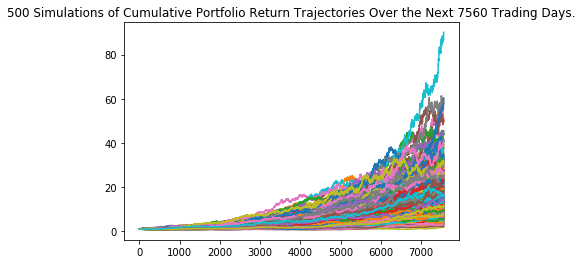

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_lines_plot=mc_dist.plot_simulation()

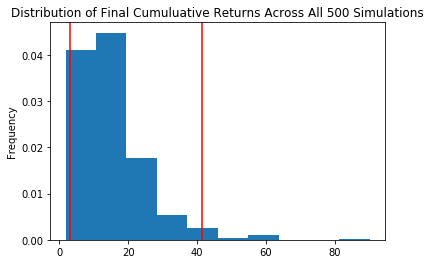

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot= mc_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl=mc_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             15.389895
std              10.312801
min               1.836588
25%               8.400885
50%              12.904886
75%              19.248904
max              90.152744
95% CI Lower      3.255427
95% CI Upper     41.476156
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [22]:
# Set initial investment
initial_investment = 20000

ci_upper=round(even_tbl[9]*initial_investment,2)
ci_lower=round(even_tbl[8]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65108.53 and $829523.11


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_upper_increased=round(even_tbl[9]*initial_investment,2)
ci_lower_increased=round(even_tbl[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_increased} and ${ci_upper_increased}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $97662.8 and $1244284.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [99]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

mc_dist_5=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.5,.95],
    num_simulation=500,
    num_trading_days=252*5
)

mc_dist_5.portfolio_data.head()

AGG                                                       SPY  \
              open     high     low    close     volume daily_return    open   
2015-08-25  109.70  109.700  109.13  109.450  3843124.0          NaN  195.43   
2015-08-26  109.08  109.410  108.88  108.950  3673170.0    -0.004568  192.08   
2015-08-27  108.95  109.195  108.93  109.100  3454665.0     0.001377  197.02   
2015-08-28  109.34  109.370  108.93  109.001  4604866.0    -0.000907  198.50   
2015-08-31  109.28  109.370  108.90  108.920  3866305.0    -0.000743  198.11   

                                                             
               high     low   close     volume daily_return  
2015-08-25  195.450  187.06  187.24  270267060          NaN  
2015-08-26  194.790  188.37  194.56  255843495     0.039094  
2015-08-27  199.410  195.21  199.28  226847229     0.024260  
2015-08-28  199.835  197.92  199.28  111959716     0.000000  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430

In [100]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003177,1.001565,0.986969,1.004494,0.991032,0.999271,1.005551,1.001555,0.997885,0.984328,...,1.008657,1.004812,1.000755,0.999701,0.995162,0.993924,1.009703,0.998107,1.015679,1.007913
2,0.988551,0.989388,0.965910,1.018442,0.991376,0.998828,1.017148,0.981692,1.011991,0.997022,...,1.010152,1.018993,0.998635,0.995104,0.992969,0.997299,1.010377,0.987586,1.037255,1.011110
3,0.976620,0.970693,0.948749,1.008131,0.994436,1.008206,1.008664,0.997429,1.004770,1.004252,...,1.007695,0.984732,1.012122,1.011226,0.990017,0.988582,1.013180,1.000719,1.023476,1.008368
4,0.960530,0.982280,0.941340,1.015369,0.989524,0.993722,0.997203,1.013457,1.025018,1.008073,...,1.032422,0.982065,1.011086,1.015195,0.995589,0.984645,1.021051,1.012967,1.029964,1.005064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.081377,1.578800,1.404607,1.544797,1.329703,2.487657,0.924637,1.701564,4.209738,0.981011,...,1.778022,2.662047,2.833853,2.559005,1.110799,3.791278,2.163059,4.467011,1.668948,2.317694
1257,3.023981,1.565528,1.393770,1.553185,1.357898,2.513884,0.936386,1.719113,4.254957,0.993892,...,1.770417,2.652165,2.847472,2.562000,1.120948,3.776844,2.142385,4.520548,1.671087,2.338724
1258,3.009865,1.573115,1.384798,1.563649,1.361576,2.516942,0.932041,1.722477,4.294452,0.999782,...,1.771780,2.671503,2.852305,2.570892,1.105013,3.856657,2.137277,4.449206,1.702444,2.303931
1259,3.011230,1.574138,1.357695,1.555272,1.375474,2.545224,0.956257,1.737788,4.317514,0.996016,...,1.803384,2.640785,2.886083,2.523768,1.083771,3.835186,2.120368,4.375184,1.690322,2.348855


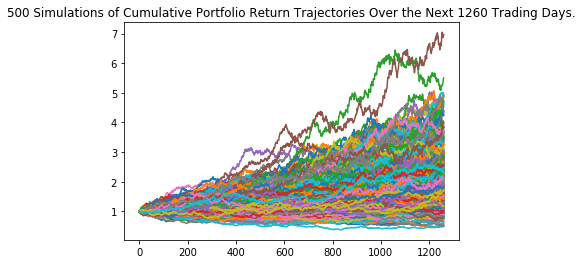

In [101]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_5_lines=mc_dist_5.plot_simulation()

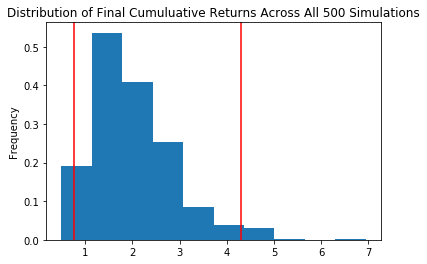

In [102]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_dist_5_lines=mc_dist_5.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five=mc_dist_5.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              2.012309
std               0.886506
min               0.494459
25%               1.403199
50%               1.831613
75%               2.502552
max               6.948194
95% CI Lower      0.771779
95% CI Upper      4.303011
Name: 1260, dtype: float64


In [116]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=235000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_five=round(tbl_five[9]*initial_investment,2)
ci_lower_five=round(tbl_five[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $235000 in the portfolio over the next 5 years will end within in the range of $181368.01 and $1011207.56


### *For the purpose of analysis - I am assuming maximum possible return. I understand that realistically, the client's invesmtent return would fall somewhere near the middle. We're assuming 1 million is needed for retirement.* First I assessed different stock/bond mixes. Investing 60,000 at 95% bond and 5% stock with an investment of 60,000.00 led to a high return of 142,141.52. An investment 60,000 initial investment at 95% stock and 5% bond, returns returns a maxium of 258,180.65. Once realizing the greater stock mixes yield higher returns, to reach a million in five years you would need a minimum of 235,000.00 

### Ten Years Retirement Option

In [76]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_dist_10=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.5,.95],
    num_simulation=500,
    num_trading_days=252*10
)

mc_dist_10.portfolio_data.head()

AGG                                                       SPY  \
              open     high     low    close     volume daily_return    open   
2015-08-25  109.70  109.700  109.13  109.450  3843124.0          NaN  195.43   
2015-08-26  109.08  109.410  108.88  108.950  3673170.0    -0.004568  192.08   
2015-08-27  108.95  109.195  108.93  109.100  3454665.0     0.001377  197.02   
2015-08-28  109.34  109.370  108.93  109.001  4604866.0    -0.000907  198.50   
2015-08-31  109.28  109.370  108.90  108.920  3866305.0    -0.000743  198.11   

                                                             
               high     low   close     volume daily_return  
2015-08-25  195.450  187.06  187.24  270267060          NaN  
2015-08-26  194.790  188.37  194.56  255843495     0.039094  
2015-08-27  199.410  195.21  199.28  226847229     0.024260  
2015-08-28  199.835  197.92  199.28  111959716     0.000000  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430

In [77]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005797,1.014331,0.980656,1.005121,0.983517,0.980178,0.979970,0.988172,1.013794,0.990138,...,1.006710,0.988578,0.999708,0.985777,0.997100,0.989526,1.011557,1.007427,1.000167,0.984242
2,1.020252,1.018827,0.981224,0.997394,0.986425,0.978428,0.989503,0.982229,1.020466,0.975599,...,1.009289,0.983605,0.995432,0.985052,1.003794,0.990907,1.005542,1.009919,1.010905,0.978842
3,1.020722,1.006535,0.990298,0.991376,0.982349,0.993246,0.995288,0.997677,1.019888,0.973875,...,0.977057,0.974231,1.007279,0.997789,0.992735,0.987518,1.004545,1.015389,1.010308,0.984161
4,1.022575,1.014307,0.982370,1.010752,0.972054,0.984967,0.984058,1.003397,1.018397,0.967093,...,0.995828,0.979363,0.999461,0.993508,1.017976,0.993901,1.021265,1.019755,0.996215,0.993160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.432147,3.272769,9.385405,3.541551,2.876176,3.923409,1.088583,5.608362,5.799180,5.980545,...,11.119216,2.623659,9.146907,4.897287,4.099947,0.682603,14.194167,5.318893,7.863704,4.699627
2517,6.477240,3.254204,9.397232,3.516758,2.863283,3.921064,1.097482,5.612119,5.804252,5.897894,...,11.213617,2.593418,9.157222,4.848603,4.031599,0.676854,14.164643,5.386621,7.862777,4.610740
2518,6.506773,3.255050,9.306378,3.467807,2.842181,4.016258,1.090986,5.658193,5.882219,5.723528,...,11.275262,2.597062,9.145505,4.854531,4.076131,0.681080,14.088316,5.299852,7.781076,4.609387
2519,6.504547,3.250939,9.465161,3.445899,2.831676,4.021780,1.104141,5.735615,5.821195,5.735641,...,11.291018,2.588828,9.126498,4.856179,4.089871,0.682828,14.277702,5.352829,7.686906,4.601101


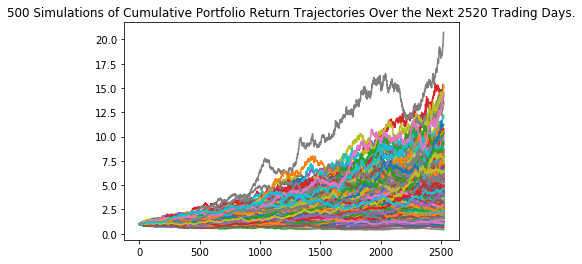

In [82]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_10_lines=mc_dist_10.plot_simulation()

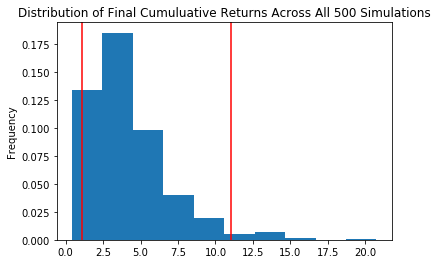

In [83]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_dist_10_plot=mc_dist_10.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten=mc_dist_10.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              4.208191
std               2.678931
min               0.421075
25%               2.398641
50%               3.532104
75%               5.325497
max              20.745762
95% CI Lower      1.105342
95% CI Upper     11.035435
Name: 2520, dtype: float64


In [87]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=95000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_upper_ten=round(tbl_ten[9]*initial_investment,2)
ci_lower_ten=round(tbl_ten[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $95000 in the portfolio over the next 10 years will end within in the range of $105007.48 and $1048366.37


### In the 10 year scenario, an initial investment of 60,000.00 with an equity/bond mix of 5/95 yields a maximum of 245,590.86. In a scenario of 95/5, the max reaches 662,126.13. Again, the higher stock mix yields higher returns. To reach a possible maximum of 1 million would require an initial investment of approximately 95,000.00